In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score,mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import plot_model
import pydot

ModuleNotFoundError: No module named 'tensorflow.keras'

In [3]:
data=pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
x=data.drop('charges',axis=1)
y=data['charges']

In [ ]:
print(x.head())

   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define your feature columns
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker','region']

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Fit and transform the data
x_transformed = preprocessor.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_transformed,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(1070, 11)

In [ ]:
model=Sequential()
model.add(Dense(128,input_shape=(x_train.shape[1],),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='linear'))

In [ ]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [ ]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=200,batch_size=32)

Epoch 1/200
31/31 [==============================] - 2s 11ms/step - loss: 325488864.0000 - mae: 13462.5547 - val_loss: 294417184.0000 - val_mae: 12273.7266
Epoch 2/200
31/31 [==============================] - 0s 3ms/step - loss: 324737312.0000 - mae: 13435.5400 - val_loss: 292406304.0000 - val_mae: 12196.6787
Epoch 3/200
31/31 [==============================] - 0s 4ms/step - loss: 317873184.0000 - mae: 13190.0127 - val_loss: 277759072.0000 - val_mae: 11625.3027
Epoch 4/200
31/31 [==============================] - 0s 4ms/step - loss: 283591040.0000 - mae: 11883.6953 - val_loss: 220738624.0000 - val_mae: 9268.7373
Epoch 5/200
31/31 [==============================] - 0s 4ms/step - loss: 196106480.0000 - mae: 8718.2061 - val_loss: 131918568.0000 - val_mae: 7113.8574
Epoch 6/200
31/31 [==============================] - 0s 5ms/step - loss: 127517560.0000 - mae: 8623.6572 - val_loss: 110016616.0000 - val_mae: 8477.3105
Epoch 7/200
31/31 [==============================] - 0s 3ms/step - loss: 1

In [ ]:
print(type(x_train))
print(type(y_train))
print(x_train.dtype)
print(y_train.dtype)
print(x_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
float64
float64
(1070, 11)
(1070,)


In [ ]:
x_train[0]

array([ 0.48366788, -1.75747362,  0.75107928,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ])

In [ ]:
def plot_loss_accuracy(history):
  train_loss=history.history['loss']
  val_loss=history.history['val_loss']
  train_mae=history.history['mae']
  val_mae=history.history['val_mae']

  fig,ax=plt.subplots(1,2,figsize=(15,5))
  ax[0].plot(train_loss,label='Training Loss')
  ax[0].plot(val_loss,label='Validation Loss')
  ax[0].set_title('Training loss and Validation loss')
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('loss')
  ax[0].legend()

  ax[1].plot(train_mae,label='training mae')
  ax[1].plot(val_mae,label='validation mae')
  ax[1].set_title('Training mae and Validation mae')
  ax[1].set_xlabel('epochs')
  ax[1].set_ylabel('mae')
  ax[1].legend()

  plt.show()

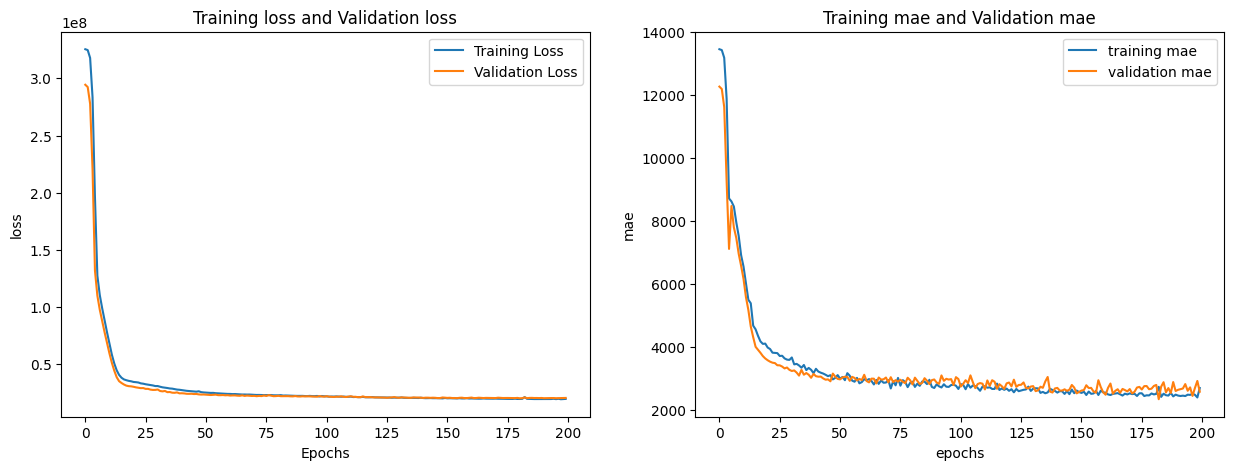

In [ ]:
plot_loss_accuracy(history)

In [ ]:
y_pred=model.predict(x_test)

9/9 [==============================] - 0s 3ms/step


In [ ]:
test_loss,test_mae=model.evaluate(x_test,y_test,verbose=0)
print(f'test loss:{test_loss:.2f},Test mae:{test_mae:.2f}')

test loss:19072248.00,Test mae:2408.62


In [ ]:
r2_score(y_test,y_pred)

0.8771504174794718

In [ ]:
new_data=pd.DataFrame({
    'age':[30],
    'sex':['male'],
    'bmi':[25],
    'children':[2],
    'smoker':['yes'],
    'region':['southeast']
})
income=1200000
new_data_transformed=preprocessor.transform(new_data)
prediction=model.predict(new_data_transformed)

if prediction[0][0]<income/12:
  print('Predicted charges:',prediction[0][0])
else:
  print('The applicant cannot pay for the insurance')

1/1 [==============================] - 0s 24ms/step
Predicted charges: 18924.99


In [ ]:
# Step 7: Use the trained model to make predictions on new data
new_data = pd.DataFrame({
    'age': [30],
    'sex': ['male'],
    'bmi': [25.5],
    'children': [2],
    'smoker': ['no'],
    'region': ['northwest']
})
new_data = preprocessor.transform(new_data)
prediction = model.predict(new_data)[0][0]
print('Predicted charges:', prediction)

1/1 [==============================] - 0s 27ms/step
Predicted charges: 5962.9805


In [ ]:
print(prediction)

5962.9805


In [ ]:
model.save('./Model/model.h5')

In [ ]:
data.groupby('smoker')['charges'].mean()

,charges
smoker,
no,8434.268298
yes,32050.231832


In [ ]:
grouped = data.groupby('smoker')

for name, group in grouped:
    print(f"Group: {name}")
    print(group)


Group: no
      age     sex     bmi  children smoker     region      charges
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
5      31  female  25.740         0     no  southeast   3756.62160
...   ...     ...     ...       ...    ...        ...          ...
1332   52  female  44.700         3     no  southwest  11411.68500
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500

[1064 rows x 7 columns]
Group: yes
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
11     62  femal

In [ ]:
print(tf.__version__)

2.15.0
